# COVID-19 Dataset : EDA & Data Visualization

##### Description
COVID-19 case surveillance data are collected by US jurisdictions and shared voluntarily with CDC (Centers for Disease Control and Prevention). The deidentified data in the public use dataset include demographic characteristics, exposure history, disease severity indicators and outcomes, clinical data, laboratory diagnostic test results, and comorbidities. All data elements can be found on the COVID-19 case report form located at www.cdc.gov/coronavirus/2019-ncov/downloads/pui-form.pdf.

##### Detail of Dataset
| Variable | 	Definition | 	Key |
|-----------:|-------------:|-------------:|
| cdc_report_dt | Date CDC reported | |
| pos_spec_dt | Date of first positive specimen collection | |
| onset_dt | Date for symptoms detected onset | |
| current_status | Current status of this person | |
| sex | Person Gender | Male/Female |
| age_group | Age group categories | |
| Race and ethnicity | Case Demographic | |
| hosp_yn | Was the patient hospitalized? | 0=No, 1=Yes, 2=Missing, 3=Unknown |
| icu_yn | Was the patient admitted to an intensive care unit (ICU)? | 0=No, 1=Yes, 2=Missing, 3=Unknown |
| death_yn | Did the patien die as a result of this illness? | 0=No, 1=Yes, 2=Missing, 3=Unknown |
| medcond_yn | Did they have any underlying medical conditions and/or risk behaviors? | 0=No, 1=Yes, 2=Missing, 3=Unknown |

## Exploratory Data Analysis

### Import Data

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000

import seaborn as sns # visualisasi data

%matplotlib inline

print(f'Matplotlib: {matplotlib.__version__}')
print(f'pandas: {pd.__version__}')
print(f'numpy: {np.__version__}')

Matplotlib: 3.2.2
pandas: 1.0.5
numpy: 1.18.5


In [2]:
# load file CSV
covid = pd.read_csv('./COVID-19_Case_Surveillance_Public_Use_Data.csv') # memuat file csv sebagai data frame
covid.head() # tampilkan 5 baris pertama

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


In [3]:
# bentuk/dimensi dataset (baris,kolom)
covid.shape

(8405079, 11)

In [4]:
# tipe data untuk tiap kolom
covid.dtypes

cdc_report_dt                    object
pos_spec_dt                      object
onset_dt                         object
current_status                   object
sex                              object
age_group                        object
Race and ethnicity (combined)    object
hosp_yn                          object
icu_yn                           object
death_yn                         object
medcond_yn                       object
dtype: object

### Preprocessing Data

In [5]:
# mendeteksi keberadaan missing values
covid.isna().values.any()

True

In [6]:
# tampilkan hanya baris dengan missing values
covid[covid.isna()]

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8405074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8405075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8405076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8405077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# drop semua baris dengan missing values
covid.dropna(inplace=True)

In [8]:
covid.shape

(1386645, 11)

In [9]:
# mengubah tipe data kolom cdc_report_dt menjadi datetime
covid ['cdc_report_dt'] = pd.to_datetime(covid['cdc_report_dt'], format = '%Y/%m/%d')

In [10]:
# mengubah tipe data kolom pos_spec_dt menjadi datetime
covid ['pos_spec_dt'] = pd.to_datetime(covid['pos_spec_dt'], format = '%Y/%m/%d')

In [11]:
# mengubah tipe data kolom onset_dt menjadi datetime
covid ['onset_dt'] = pd.to_datetime(covid['onset_dt'], format = '%Y/%m/%d')
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386645 entries, 1 to 7494730
Data columns (total 11 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   cdc_report_dt                  1386645 non-null  datetime64[ns]
 1   pos_spec_dt                    1386645 non-null  datetime64[ns]
 2   onset_dt                       1386645 non-null  datetime64[ns]
 3   current_status                 1386645 non-null  object        
 4   sex                            1386645 non-null  object        
 5   age_group                      1386645 non-null  object        
 6   Race and ethnicity (combined)  1386645 non-null  object        
 7   hosp_yn                        1386645 non-null  object        
 8   icu_yn                         1386645 non-null  object        
 9   death_yn                       1386645 non-null  object        
 10  medcond_yn                     1386645 non-null  objec

In [12]:
#mengubah nama kolom Race and ethnicity (combined) menjadi race
covid.rename(columns={'Race and ethnicity (combined)': 'race'}, inplace=True)

In [13]:
covid

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race,hosp_yn,icu_yn,death_yn,medcond_yn
1,2020-11-14,2020-11-10,2020-11-10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020-11-19,2020-11-10,2020-11-09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
4,2020-11-13,2020-11-10,2020-11-10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
5,2020-11-17,2020-11-10,2020-11-08,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
11,2020-11-09,2020-11-10,2020-11-09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
7494726,2020-11-12,2020-12-01,2020-11-12,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",Unknown,Missing,Missing,Missing
7494727,2020-10-28,2020-12-01,2020-10-28,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",Unknown,Missing,Missing,Missing
7494728,2020-09-26,2020-12-01,2020-09-26,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",No,Missing,Missing,Missing
7494729,2020-09-18,2020-12-01,2020-09-18,Laboratory-confirmed case,Male,20 - 29 Years,"Black, Non-Hispanic",No,Missing,Missing,Missing


#### Mengubah nilai No, Yes, Missing, dan Unknown menjadi 0, 1, 2, dan 3 pada kolom ```hosp_yn```, ```icu_yn```, ```death_yn```, dan ```medcond_yn```
Kolom ```hosp_yn```

In [14]:
covid['hosp_yn'] = covid['hosp_yn'].map({'No': 0, 'Yes': 1, 'Missing': 2, 'Unknown': 3})

Kolom ```icu_yn```

In [15]:
covid['icu_yn'] = covid['icu_yn'].map({'No': 0, 'Yes': 1, 'Missing': 2, 'Unknown': 3})

Kolom ```death_yn```

In [16]:
covid['death_yn'] = covid['death_yn'].map({'No': 0, 'Yes': 1, 'Missing': 2, 'Unknown': 3})

Kolom ```medcond_yn```

In [17]:
covid['medcond_yn'] = covid['medcond_yn'].map({'No': 0, 'Yes': 1, 'Missing': 2, 'Unknown': 3})
covid

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race,hosp_yn,icu_yn,death_yn,medcond_yn
1,2020-11-14,2020-11-10,2020-11-10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",0,0,0,0
2,2020-11-19,2020-11-10,2020-11-09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",0,0,0,0
4,2020-11-13,2020-11-10,2020-11-10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",0,0,0,1
5,2020-11-17,2020-11-10,2020-11-08,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",2,2,2,2
11,2020-11-09,2020-11-10,2020-11-09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7494726,2020-11-12,2020-12-01,2020-11-12,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",3,2,2,2
7494727,2020-10-28,2020-12-01,2020-10-28,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",3,2,2,2
7494728,2020-09-26,2020-12-01,2020-09-26,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",0,2,2,2
7494729,2020-09-18,2020-12-01,2020-09-18,Laboratory-confirmed case,Male,20 - 29 Years,"Black, Non-Hispanic",0,2,2,2


### Analyze Data

In [18]:
covid.describe()

,hosp_yn,icu_yn,death_yn,medcond_yn
count,1.386645e+06,1.386645e+06,1.386645e+06,1.386645e+06
mean,4.710449e-01,1.376765e+00,7.420118e-01,1.126286e+00
std,8.712780e-01,1.185655e+00,1.070553e+00,1.005989e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00
75%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
max,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00


In [19]:
covid.dtypes

cdc_report_dt     datetime64[ns]
pos_spec_dt       datetime64[ns]
onset_dt          datetime64[ns]
current_status            object
sex                       object
age_group                 object
race                      object
hosp_yn                    int64
icu_yn                     int64
death_yn                   int64
medcond_yn                 int64
dtype: object

In [20]:
#urutkan dataset berdasarkan cdc_report_dt, pos_spect_dt dan onset_dt secara ascending
cov = covid.sort_values(by=['cdc_report_dt', 'pos_spec_dt', 'onset_dt'])
cov.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race,hosp_yn,icu_yn,death_yn,medcond_yn
2155067,2020-01-01,2020-03-15,2020-01-01,Laboratory-confirmed case,Male,40 - 49 Years,"Black, Non-Hispanic",1,1,0,0
2876106,2020-01-01,2020-03-20,2020-01-01,Laboratory-confirmed case,Female,30 - 39 Years,"White, Non-Hispanic",0,3,0,3
6853012,2020-01-01,2020-07-14,2020-01-01,Laboratory-confirmed case,Female,60 - 69 Years,"White, Non-Hispanic",0,0,0,1
2819969,2020-01-02,2020-10-12,2020-01-02,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",0,3,0,1
7168707,2020-01-09,2020-11-11,2020-01-09,Laboratory-confirmed case,Male,20 - 29 Years,Hispanic/Latino,0,3,0,3


In [23]:
# membuat cdc_report_dt sebagai indeks
cov = cov.set_index('cdc_report_dt')

KeyError: "None of ['cdc_report_dt'] are in the columns"

In [24]:
cov

,pos_spec_dt,onset_dt,current_status,sex,age_group,race,hosp_yn,icu_yn,death_yn,medcond_yn
cdc_report_dt,,,,,,,,,,
2020-01-01,2020-03-15,2020-01-01,Laboratory-confirmed case,Male,40 - 49 Years,"Black, Non-Hispanic",1,1,0,0
2020-01-01,2020-03-20,2020-01-01,Laboratory-confirmed case,Female,30 - 39 Years,"White, Non-Hispanic",0,3,0,3
2020-01-01,2020-07-14,2020-01-01,Laboratory-confirmed case,Female,60 - 69 Years,"White, Non-Hispanic",0,0,0,1
2020-01-02,2020-10-12,2020-01-02,Laboratory-confirmed case,Male,30 - 39 Years,"White, Non-Hispanic",0,3,0,1
2020-01-09,2020-11-11,2020-01-09,Laboratory-confirmed case,Male,20 - 29 Years,Hispanic/Latino,0,3,0,3
...,...,...,...,...,...,...,...,...,...,...
2020-11-19,2020-11-30,2020-11-19,Laboratory-confirmed case,Male,50 - 59 Years,"Black, Non-Hispanic",0,0,2,2
2020-11-19,2020-11-30,2020-11-19,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,0,3,0,3
2020-11-19,2020-11-30,2020-11-19,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",3,2,2,2


#### Tampilkan waktu pengumpulan Spesimen Positif Pertama diurutkan dari pengumpulan terbanyak

Spesimen Positif Pertama dapat diidentifikasi dari kolom ```pos_spec_dt```

In [25]:
cov['pos_spec_dt'].value_counts()

2020-11-09    21470
2020-11-10    17924
2020-11-02    16676
2020-11-05    16344
2020-11-04    15578
              ...  
2020-01-31        1
2020-02-20        1
2020-01-27        1
2020-01-16        1
2020-01-04        1
Name: pos_spec_dt, Length: 302, dtype: int64

#### Tampilkan data dengan laporan kematian lalu simpan pada variabel ```death```

Kematian dapat diidentifikasi dari kolom ```death_yn```.
Lalu tampilkan jumlah kematian berdasarkan rentang umur, diurutkan dari kematian terbanyak dari kolom ```age_group```

In [26]:
death = cov.loc[(cov['death_yn'] ==1)]
death['age_group'].value_counts()

80+ Years        12711
70 - 79 Years     6898
60 - 69 Years     5003
50 - 59 Years     2638
40 - 49 Years     1051
30 - 39 Years      415
20 - 29 Years      167
10 - 19 Years       49
0 - 9 Years         19
Name: age_group, dtype: int64

#### Tampilkan data jumlah orang dengan ras Hispanic/Latino berumur 20-29 tahun, status saat ini confirmed dan sudah berada di rumah sakit

Lakukan seleksi status dari kolom ```current_status```, kategori umur dari ```age_group```, rumah sakit dari ```hosp_yn``` dan ras dari ```race```

In [27]:
hispanic = cov.loc[(cov['current_status'] == 'Laboratory-confirmed case')
           & (cov['age_group'] == '20 - 29 Years')
           & (cov['race'] == 'Hispanic/Latino')
           & (cov['hosp_yn'] == 1)].groupby(['race','current_status','age_group','hosp_yn'])['race'].count()
hispanic

race             current_status             age_group      hosp_yn
Hispanic/Latino  Laboratory-confirmed case  20 - 29 Years  1          1462
Name: race, dtype: int64

## Visualization

Menampilkan grafik menggunakan pair plot untuk melihat kondisi ```hosp_yn```, ```icu_yn```, ```death_yn```, dan ```medcond_yn``` berdasarkan ras/etnisnya

D:\Program\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Program\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Program\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


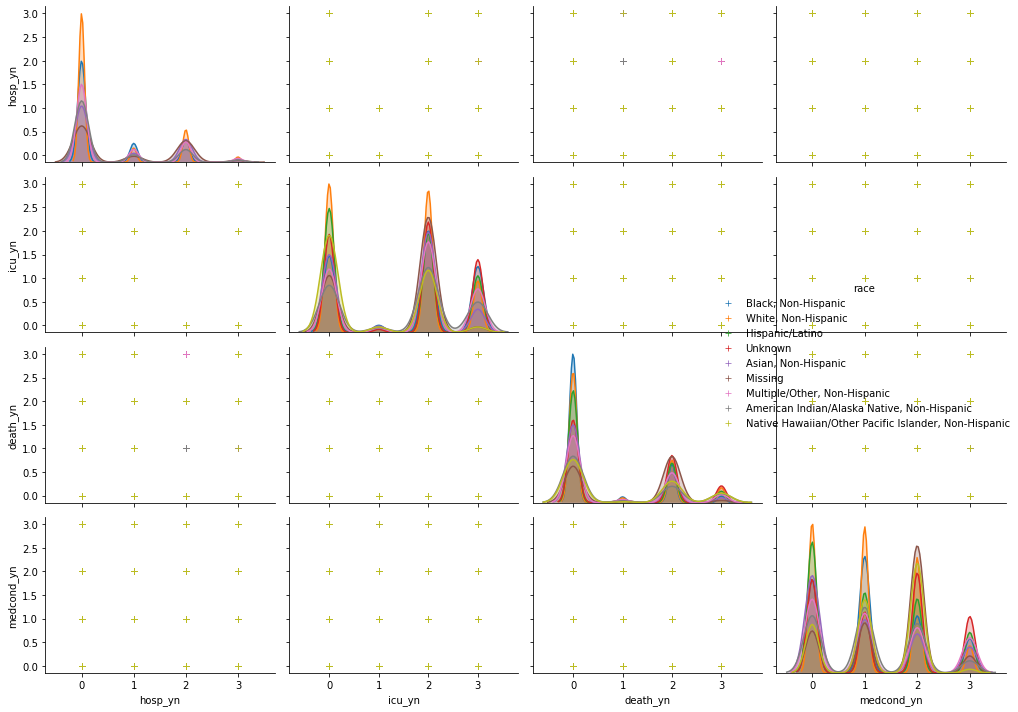

In [28]:
sns.pairplot(cov, hue='race', markers='+')
plt.tight_layout()

Menampilkan grafik jumlah orang berdasarkan Gender dengan plot bar

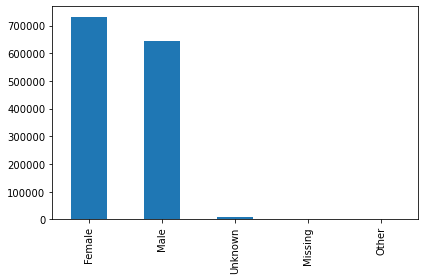

In [29]:
cov['sex'].value_counts().plot.bar()

plt.tight_layout()
plt.show()

Menampilkan grafik jumlah orang/pasien berdasarkan status saat ini, gender, kelompok usia, dan ras/etnis

Text(0.5, 1.0, 'Ras/Etnis')

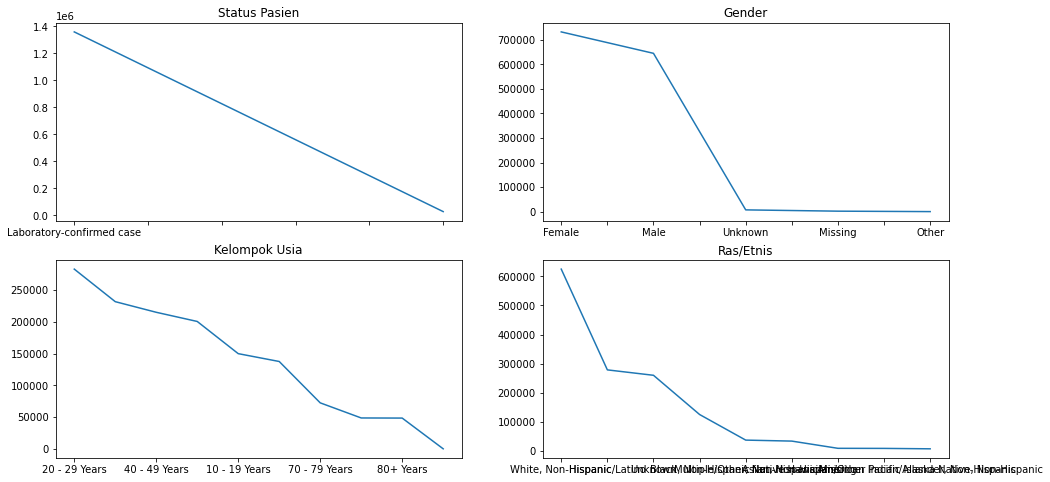

In [55]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))

cov['current_status'].value_counts().plot.line(ax=ax[0][0])
ax[0][0].set_title('Status Pasien')

cov['sex'].value_counts().plot.line(ax=ax[0][1])
ax[0][1].set_title('Gender')

cov.age_group.value_counts().plot.line(ax=ax[1][0])
ax[1][0].set_title('Kelompok Usia')

cov.race.value_counts().plot.line(ax=ax[1][1])
ax[1][1].set_title('Ras/Etnis')

Menampilkan grafik menggunakan pair plot untuk melihat kondisi ```hosp_yn```, ```icu_yn```, ```death_yn```, dan ```medcond_yn``` dengan Histogram

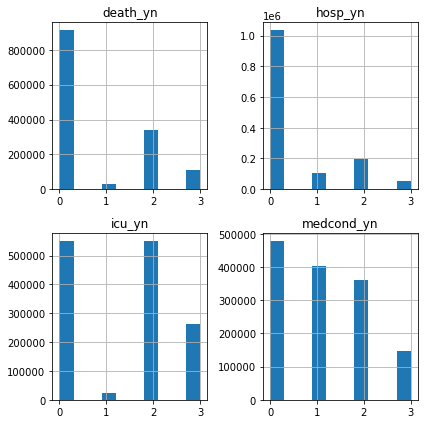

In [30]:
cov.hist(figsize=(6,6), bins=10)
plt.tight_layout()

Menampilkan grafik jumlah pengumpulan spesimen positif dari waktu ke waktu dengan subplots

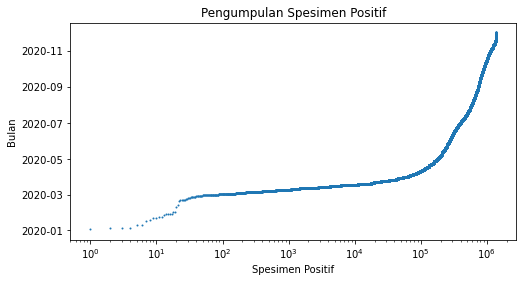

In [31]:
fig, ax = plt.subplots(figsize=(8,4))
_ = ax.set_title('Pengumpulan Spesimen Positif')
_ = ax.plot(np.sort(cov['pos_spec_dt']), marker='o', markersize=1, linestyle='')

_ = ax.set_xscale('log')
_ = ax.set_ylabel('Bulan')
_ = ax.set_xlabel('Spesimen Positif')

Menampilkan grafik perbandingan jumlah pengumpulan spesimen positif dari waktu ke waktu dengan jumlah laporan pasien dengan gejala yang diterima CDC

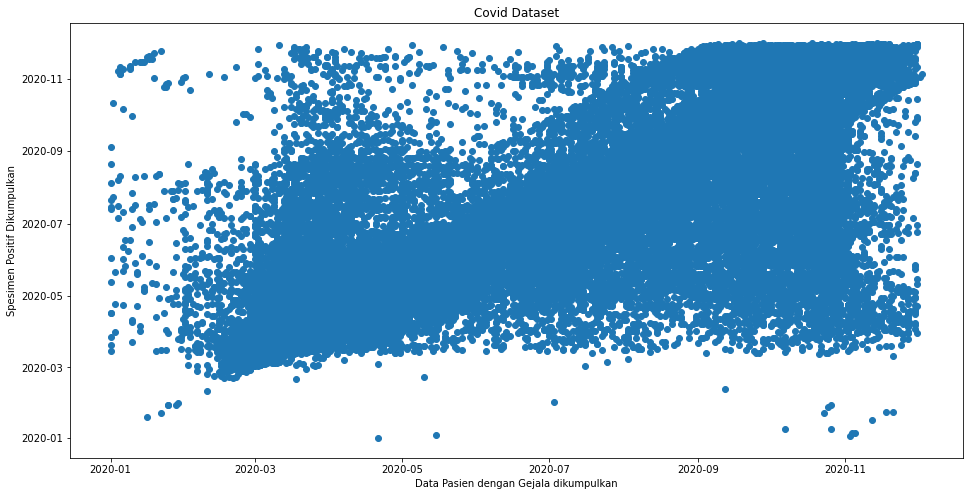

In [37]:
fig, ax = plt.subplots(figsize=(16,8))

_ = ax.scatter('onset_dt', 'pos_spec_dt', data=cov)

_ = ax.set_title('Covid Dataset')
_ = ax.set_xlabel('Data Pasien dengan Gejala dikumpulkan')
_ = ax.set_ylabel('Spesimen Positif Dikumpulkan')

Menampilkan grafik ras/etnis

<ipython-input-40-5060b67abcaa>:3: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


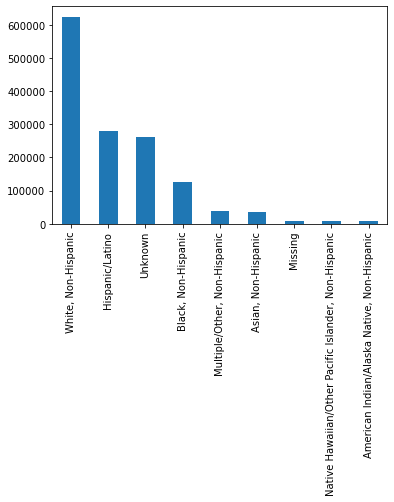

In [40]:
cov['race'].value_counts().plot.bar()

plt.tight_layout()
plt.show()